# CODING TEST QUESTION 3

### TIME SERIES FORECASTING USING ARIMA MODEL

### Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Sai Sidharth\Downloads\CodingTest1608\DatasetCodingChallenge\ETLRatio.csv')

In [3]:
df.dtypes

Year           int64
Month         object
ETL_ratio    float64
dtype: object

In [4]:
df.columns

Index(['Year', 'Month', 'ETL_ratio'], dtype='object')

### Adding a new column day with first day of the month

In [5]:
df['Day']=1

In [6]:
df.head(5)

,Year,Month,ETL_ratio,Day
0,2017,June,9.102106,1
1,2017,November,2.020811,1
2,2017,July,8.649923,1
3,2017,September,1.465211,1
4,2017,May,0.042752,1


### Replacing each and every month into numeric values

In [7]:
df['Month']=df['Month'].replace('January',1)
df['Month']=df['Month'].replace('February',2)
df['Month']=df['Month'].replace('March',3)
df['Month']=df['Month'].replace('April',4)
df['Month']=df['Month'].replace('May',5)
df['Month']=df['Month'].replace('June',6)
df['Month']=df['Month'].replace('July',7)
df['Month']=df['Month'].replace('August',8)
df['Month']=df['Month'].replace('September',9)
df['Month']=df['Month'].replace('October',10)
df['Month']=df['Month'].replace('November',11)
df['Month']=df['Month'].replace('December',12)

In [8]:
df.head(40)

,Year,Month,ETL_ratio,Day
0,2017,6,9.102106,1
1,2017,11,2.020811,1
2,2017,7,8.649923,1
3,2017,9,1.465211,1
4,2017,5,0.042752,1
5,2017,1,0.918074,1
6,2017,12,1.963108,1
7,2017,10,1.451187,1
8,2017,4,0.087610,1
9,2017,8,0.507751,1


### Create a new column named Column 1 to store the datetime format

In [9]:
df['Column1']=pd.to_datetime(df[['Year','Month','Day']])

In [10]:
df = df.drop(['Year','Month','Day'],axis=1)

In [11]:
df

,ETL_ratio,Column1
0,9.102106,2017-06-01
1,2.020811,2017-11-01
2,8.649923,2017-07-01
3,1.465211,2017-09-01
4,0.042752,2017-05-01
5,0.918074,2017-01-01
6,1.963108,2017-12-01
7,1.451187,2017-10-01
8,0.087610,2017-04-01
9,0.507751,2017-08-01


### Re-arranging the columns into a new dataset

In [13]:
df1=df[['Column1','ETL_ratio']]

In [14]:
df1.head(5)

,Column1,ETL_ratio
0,2017-06-01,9.102106
1,2017-11-01,2.020811
2,2017-07-01,8.649923
3,2017-09-01,1.465211
4,2017-05-01,0.042752


In [16]:
df1.dtypes

Column1      datetime64[ns]
ETL_ratio           float64
dtype: object

### Perform the Augmented Dicky Fuller Test

In [19]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1.ETL_ratio.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.731763
p-value: 0.000000


### Plotting the auto-correlation function for original series, first order and second order differencing

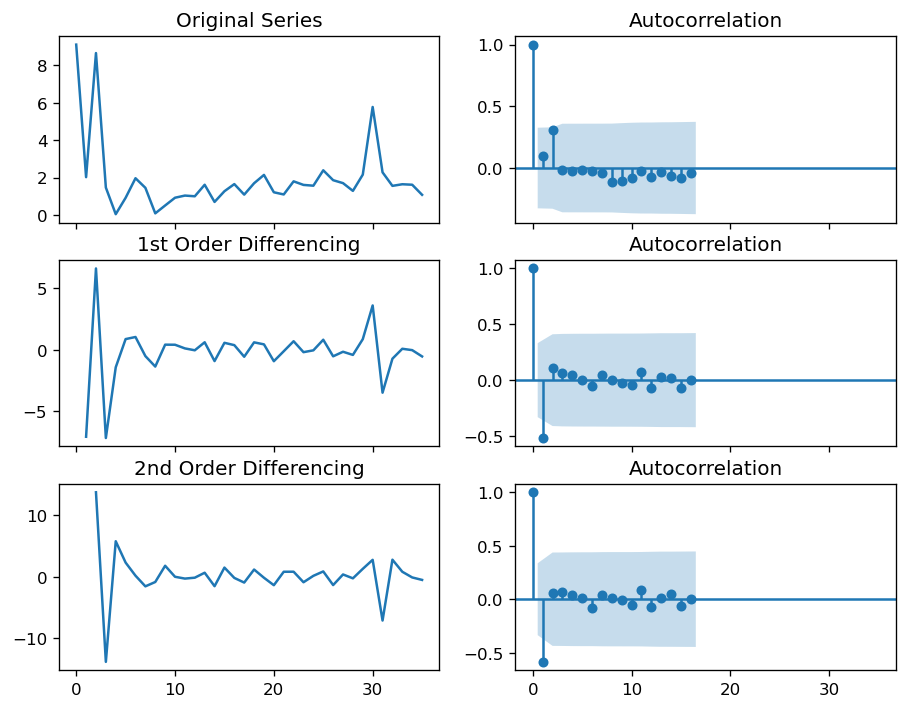

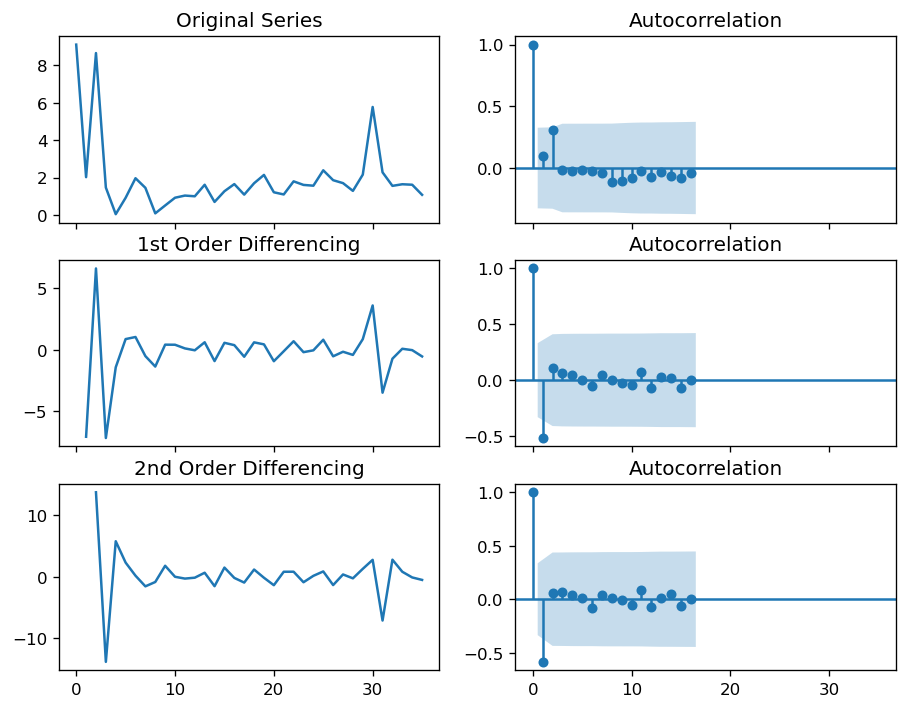

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1.ETL_ratio); axes[0, 0].set_title('Original Series')
plot_acf(df1.ETL_ratio, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1.ETL_ratio.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.ETL_ratio.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1.ETL_ratio.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.ETL_ratio.diff().diff().dropna(), ax=axes[2, 1])

### Plotting the partial auto-correlation function

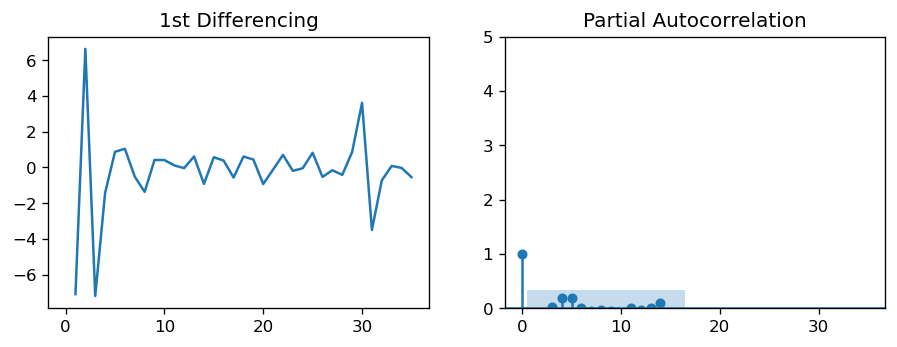

In [21]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.ETL_ratio.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1.ETL_ratio.diff().dropna(), ax=axes[1])

plt.show()

### Plotting the 1st differencing autocorrelation function

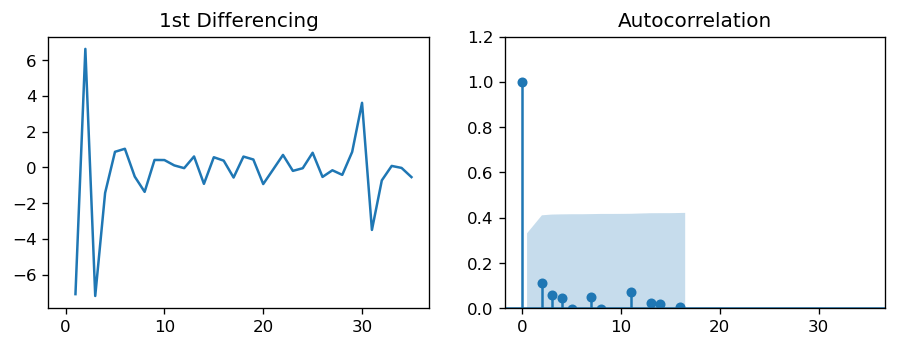

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.ETL_ratio.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df1.ETL_ratio.diff().dropna(), ax=axes[1])

plt.show()

In [25]:
#from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
#model = ARIMA(df1.ETL_ratio, order=(1,1,2))
#model_fit = model.fit(disp=0)
#print(model_fit.summary())

##  Fitting a (1,1,1) ARIMA model - (p,d,q)

In [24]:
# 1,1,1 ARIMA Model
model = ARIMA(df1.ETL_ratio, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.ETL_ratio   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -70.339
Method:                       css-mle   S.D. of innovations              1.789
Date:                Mon, 16 Aug 2021   AIC                            148.678
Time:                        23:52:07   BIC                            154.900
Sample:                             1   HQIC                           150.826
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1393      0.146     -0.956      0.339      -0.425       0.146
ar.L1.D.ETL_ratio    -0.4724      0.249     -1.895      0.058      -0.961       0.016
ma.L1.D.ETL_ratio    -0.

D:\PAC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


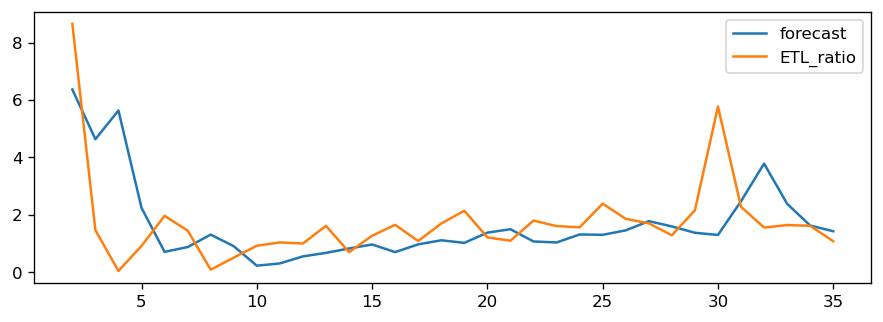

In [38]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [27]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df1.ETL_ratio[:85]
test = df1.ETL_ratio[85:]

### Building the ARIMA model for (1,1,1)

In [42]:
#Build Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.ETL_ratio   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -70.339
Method:                       css-mle   S.D. of innovations              1.789
Date:                Tue, 17 Aug 2021   AIC                            148.678
Time:                        00:12:57   BIC                            154.900
Sample:                             1   HQIC                           150.826
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1393      0.146     -0.956      0.339      -0.425       0.146
ar.L1.D.ETL_ratio    -0.4724      0.249     -1.895      0.058      -0.961       0.016
ma.L1.D.ETL_ratio    -0.

D:\PAC\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## AUTO ARIMA Method to identify the optimal paramters

In [35]:
!pip install pmdarima

In [36]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df1.ETL_ratio, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=155.544, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=176.248, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=162.814, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=171.807, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=154.598, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=152.965, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=154.718, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=156.512, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=150.725, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=154.048, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=152.453, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=152.453, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=154.228, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=154.444, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept


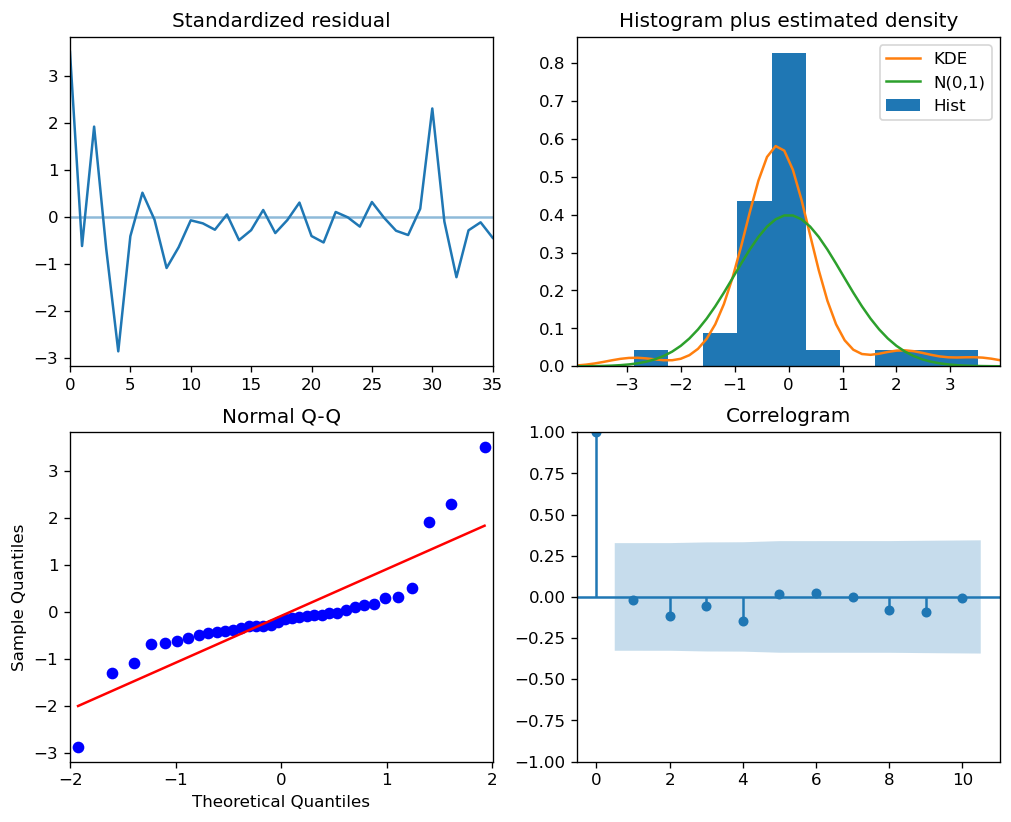

In [37]:
model.plot_diagnostics(figsize=(10,8))
plt.show()